<a href="https://colab.research.google.com/github/danielyangdev/CAIS-F23-Curriculum/blob/main/%5BL0%5D_Intro_to_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lesson 0 Notebook: Numpy, Pandas, & Pytorch Basics**

##Welcome to your first notebook in CAIS++!

**Noteboook Objective**: Notebooks are meant to help you *apply* knowledge you've learned in the lesson, and should generally take about 45 minutes - 1 hour. This particular notebook will allow you to learn and experiment with some popular Python libraries used for data manipulation and visualization. We will also introduce tensors, the basic data structure in Pytorch, which is the machine learning framework we will be using for a majority of our curriculum!

**Useful Links**:


*   [Python Cheatsheet](https://www.pythoncheatsheet.org/): recaps Python basics, flow control, funtions, data structures, etc.
*   [Tensor Operation Documentation](https://pytorch.org/docs/stable/torch.html): 100+ tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing,
indexing, slicing), sampling and more

**Important!**: Before you run any cells, click `Runtime --> Change Runtime Type --> T4 GPU (under the Hardware Accelerator Dropdown menu)`. We will talk more about the benefits of this in a later part of the notebook!





```
# This is formatted as code
```

The following three cells are necessary for setting up our development environment.
- `import drive` allows us to utilize the files that exist within our Google Drive.
- `%cd` navigates towards a folder that contains necessary files and training data.
- `!ls` displays the files that exist within the aforementioned folder (a.k.a. current working directory).

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
# cd stands for "change directory" -- move to the path described below
%cd /content/drive/MyDrive/Other/CAIS++/F23_Curriculum/L0/Notebooks

/content/drive/MyDrive/Other/CAIS++/F23_Curriculum/L0/Notebooks


In [6]:
# ls stands for "list" -- list files in the working directory
!ls

## **Pandas**
[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.

The following line imports the *pandas* API and prints the API version:

In [7]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.5.3'

The primary data structures in pandas are implemented as two classes:

*   **DataFrame**: a relational data table, with rows and named columns
*   **Series**: a single column

A DataFrame contains one or more Series and a name for each Series.
For now, we'll focus on working with dataframes, and start by loading an entire file into a DataFrame.

Run the following cell to load the data and create feature definitions:

In [8]:
# csv file is a file with "comma separated values", it's implied with .read_csv() that sep=','
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.head() # .head() allows you to visualize the first 5 rows (the "head" of the dataset)

# how would you visualize the last 5 rows?
california_housing_dataframe.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


The example above used `DataFrame.head`, which displays the first few records of a `DataFrame`. Another useful function to analyze data is `DataFrame.hist`, which displays the distribution of values in a column visualized as a graph.

array([[<Axes: title={'center': 'housing_median_age'}>]], dtype=object)

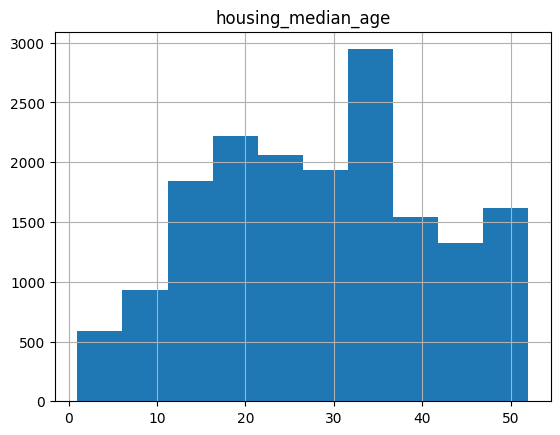

In [9]:
# display distribution of values in the 'housing_median_age column
california_housing_dataframe.hist('housing_median_age')

The `.shape` function returns a tuple representing the dimenionality of the dataset.

In [10]:
#TODO: print the number of rows and columns in the dataset
num_rows = california_housing_dataframe.shape[0]
num_cols = california_housing_dataframe.shape[1]

print("The dataset has %d rows" %num_rows)
print("The dataset has %d columns" %num_cols)

The dataset has 17000 rows
The dataset has 9 columns


###**Indexing and Filtering**
We can select a column by calling `df['column_name']`, and select a specific row by index when using `df.iloc[i]` for some integer i. For simplicity, let's work with a much smaller subset of our housing dataset for better visualization.

In [47]:
# the default number of rows displayed by head is 5, but we can enter in a custom parameter for the number of rows we want
df = california_housing_dataframe.head(10)

#TODO: determine the max amount of total bedrooms in df
max_total_bedrooms = df['total_bedrooms'].max()
max_total_bedrooms

1901.0

It is also useful to filter the dataset based on certain criteria. For example, `df[df.population > 500]` display only the entries where `population > 500`.

In [53]:
#TODO: display entries where households > 250 and population > 700
df_1 = df[df.households > 250]
df_2 = df_1[df_1.population > 700]
df_2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


###**Manipulating Data**
Let's try adding a column of categorical variables, also known as *dummy variables*, which represents which county each row belongs in to our dataset. Since raw county names may be very long strings, it's easier to use them in analysis when converted into a series of dummy or indicator variables. Below are our different categories.
*    "Orange County"
*    "Los Angeles"
*    "Santa Clara"

We can use `pd.get_dummies` to make this conversion.

In [57]:
county = [ "OC", "LA", "LA", "SC", "LA", "OC", "OC", "LA", "SC", "SC"]
# create a pandas series
series = pd.Series(county)

# TODO: convert to dummy variables
dummies = pd.get_dummies
dummies

<function pandas.core.reshape.encoding.get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'>

In [ ]:
# TODO: add our dummy variables to df as new columns
new_df = #TODO-------------------
new_df

## **Numpy**

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

To use Numpy, we first need to import the `numpy` package as done below:

In [12]:
import numpy as np

###Arrays
A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.
We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [13]:
# Create a rank 1 array
a = np.array([1, 2, 3])
print(type(a), a.shape, a[0], a[1], a[2])

# change value of the array[0] to be 5
a[0] = 5
print(a)

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


###**Array indexing**

Numpy offers several ways to index into arrays. Similar to Python lists, numpy arrays can also be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array.

In [29]:
import numpy as np

# TODO: Create the following rank 2 array (2 dimensions) with shape (3, 4) using .arange() and .reshape()
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]

a = np.arange(1, 13).reshape(3, 4)
print(a)

# TODO: Use slicing to pull out the subarray consisting of the first 2 rows and middle two columns
# [[2 3]
#  [6 7]]

b = a[0: 2, 1:3]
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[2 3]
 [6 7]]


###**Datatypes**

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [16]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

##**Array Math**

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [18]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

print(x)
print(y, '\n')
# TODO: print the elementwise product
print(x * y)

[[1. 2.]
 [3. 4.]]
[[5. 6.]
 [7. 8.]] 

[[ 5. 12.]
 [21. 32.]]


The multiplication above is strictly element-wise, not a dot product of the matrices. To get the dot product, use `np.dot`.

In [17]:
v = np.array([9, 10])
w = np.array([11, 12])

# TODO: print the dot product of v and w (219)
print(np.dot(v, w))

219


####**Broadcasting**
The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [60]:
# broadcasting example
a = np.array([0, 3, 6])
b = 5
print(a + b)

[ 5  8 11]


In [62]:
# TODO: create a 3x3 np array of all ones
M = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(3, 3)
print(M)

# what happens if you add M to a?
print(M + a)

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[1 4 7]
 [1 4 7]
 [1 4 7]]


##**Pytorch**

Now let's get into Pytorch! We choose to use PyTorch at CAIS++ because it is well established in research, has a huge developer community (originally developed by Facebook), and takes advantage of high-speed GPU performance (especially with the Collab GPUs!). Alternatives to PyTorch include [TensorFlow](https://www.tensorflow.org/), [JAX](https://github.com/google/jax#quickstart-colab-in-the-cloud) and [Caffe](http://caffe.berkeleyvision.org/).

In [63]:
import torch
import numpy as np

For every machine learning framework, a very good practice is to setup your code to be reproducible with the exact same random numbers. We do this by setting a seed.

In [64]:
torch.manual_seed(42) # Setting the seed

###**Tensors**

Tensors are the PyTorch equivalent to Numpy arrays, with the addition to also have support for GPU acceleration. The name "tensor" is a generalization of concepts you already know. For instance, a vector is a 1-D tensor, and a matrix a 2-D tensor. When working with neural networks, we will use tensors of various shapes and number of dimensions.

**Initialization**

Let's first start by looking at different ways of creating a tensor. There are many possible options, the most simple one is to call `torch.Tensor` passing the desired shape as input argument:

In [65]:
x = torch.Tensor(2, 3, 4) # create a tensor with shape [2, 3, 4]
print(x)

tensor([[[-6.4119e-25,  4.4575e-41, -5.7798e-25,  4.4575e-41],
         [-6.0989e-25,  4.4575e-41, -6.4119e-25,  4.4575e-41],
         [-6.4119e-25,  4.4575e-41, -6.4119e-25,  4.4575e-41]],

        [[-6.4119e-25,  4.4575e-41, -6.0989e-25,  4.4575e-41],
         [-1.5538e-10,  4.4574e-41, -6.4119e-25,  4.4575e-41],
         [-1.5552e-10,  4.4574e-41, -6.4060e-25,  4.4575e-41]]])


The function `torch.Tensor` allocates memory for the desired tensor, but reuses any values that have already been in the memory. To directly assign values to the tensor during initialization, there are many alternatives including:

* `torch.zeros`: Creates a tensor filled with zeros
* `torch.ones`: Creates a tensor filled with ones
* `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
* `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
* `torch.arange`: Creates a tensor containing the values $N,N+1,N+2,...,M$
* `torch.Tensor` (input list): Creates a tensor from the list elements you provide

In [66]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


In [67]:
# TODO create an Integer tensor from list [[1, 2], [3, 4]]
x_data = torch.Tensor(1, 2, 3, 4)
print(x_data)

tensor([[[[2.8793e+32, 4.7428e+30, 2.8183e+20, 6.1972e-04],
          [2.6178e-12, 6.9989e+22, 2.6330e+20, 6.1943e-04],
          [2.9972e+21, 1.0396e+21, 3.0881e+29, 6.5951e+22]],

         [[4.5445e+30, 1.7751e+28, 3.2036e-18, 1.1378e+36],
          [3.0881e+29, 2.7482e+20, 6.1949e-04, 7.3389e+28],
          [6.9790e+22, 3.1475e-12, 2.7340e+20, 6.8589e+22]]]])


**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

You can obtain the shape, datatype, and the device on which they are stored:

In [ ]:
# TODO: print the shape x_data
print(f"Shape of tensor: {'TODO'}")

# TODO: print the datatype of x_data
print(f"Datatype of tensor: {'TODO'}")

# TODO: print the device x_data is stored on
print(f"Device tensor is stored on: {'TODO'}")

**Tensor to Numpy, and Numpy to Tensor**

Tensors can be converted to numpy arrays, and numpy arrays back to tensors. To transform a numpy array into a tensor, we can use the function `torch.from_numpy`:

In [ ]:
np_arr = np.array([[1, 2], [3, 4]])

# TODO: create tensor from numpy array
tensor = # TODO----------------------

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

To transform a PyTorch tensor back to a numpy array, we can use the function `.numpy()` on tensors:

In [ ]:
tensor = torch.arange(4)

# TODO: create numpy array from tensor
np_arr = # TODO---------------------

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

**Operations**

Most operations that exist in numpy, also exist in PyTorch. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#), but we will review the most important ones here.

In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

Calling `x1 + x2` creates a new tensor containing the sum of the two inputs. However, we can also use in-place operations that are applied directly on the memory of a tensor with the `.add_` function (`x2 += x1`).

In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

# TODO: implement x2 += x1

print("X1 (after)", x1)
print("X2 (after)", x2)

Other commonly used operations include matrix multiplications, which are essential for neural networks. Quite often, we have an input vector $\mathbf{x}$, which is transformed using a learned weight matrix $\mathbf{W}$. There are multiple ways and functions to perform matrix multiplication, some of which we list below:

* `torch.matmul`: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)). Can also be written as `a @ b`, similar to numpy.
* `torch.mm`: Performs the matrix product over two matrices, but doesn't support broadcasting (see [documentation](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))
* `torch.bmm`: Performs the matrix product with a support batch dimension. If the first tensor $T$ is of shape ($b\times n\times m$), and the second tensor $R$ ($b\times m\times p$), the output $O$ is of shape ($b\times n\times p$), and has been calculated by performing $b$ matrix multiplications of the submatrices of $T$ and $R$: $O_i = T_i @ R_i$
* `torch.einsum`: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention. Explanation of the Einstein sum can be found in assignment 1.

Usually, we use `torch.matmul` or `torch.bmm`. We can try a matrix multiplication with `torch.matmul` below.

In [ ]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

In [ ]:
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)

In [ ]:
# TODO find the matrix product of x and W
h = # TODO-----------------------

# Verify the result by calculating it by hand too!
print("h", h)

**Indexing**

We often have the situation where we need to select a part of a tensor. Indexing works just like in numpy, so let's try it:

In [ ]:
x = torch.arange(12).view(3, 4)
print("X", x)
print(x[:, 1])   # Second column
print(x[0])      # First row
print(x[:2, -1]) # First two rows, last column

# TODO: print the last two rows of x


### **GPU support**

A crucial feature of PyTorch is the support of GPUs, short for Graphics Processing Unit. GPUs can accelerate the training of your network up to a factor of $100$ which is essential for our future models. PyTorch implements a lot of functionality for supporting GPUs (mostly those of NVIDIA due to the libraries [CUDA](https://developer.nvidia.com/cuda-zone) and [cuDNN](https://developer.nvidia.com/cudnn)). First, let's check whether you have a GPU available (you should, since you should be connected already):

In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

By default, all tensors you create are stored on the CPU. We can push a tensor to the GPU by using the function `.to(...)`, or `.cuda()`. However, it is often a good practice to define a `device` object in your code which points to the GPU if you have one, and otherwise to the CPU. We can specify the device as follows:

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Now let's create a tensor and push it to the device:

In [ ]:
x = torch.zeros(2, 3)
# TODO: push x to device
x = # TODO---------------------
print("X", x)

We can also compare the runtime of a large matrix multiplication on the CPU with a operation on the GPU:

In [ ]:
import time

x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

When generating random numbers, the seed between CPU and GPU is not synchronized, so we must also set the seed on the GPU:

In [ ]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    # TODO: set seed on GPU


# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

###Congrats! You just finished your first notebook!